In [22]:
import pandas as pd
import numpy as np
# import folium
import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap
from scipy.stats import gaussian_kde
import seaborn as sns

GBIF.org (04 November 2024) GBIF Occurrence Download  https://doi.org/10.15468/dl.s8gc9c

(4)  A species richness map is a spatial representation that shows the number of different 
species (i.e., species richness) present in specific geographic areas by counting the 
unique species observed within that area. It highlights the distribution of biodiversity 
across a landscape by depicting where higher or lower concentrations of species occur. 

 
Your task is to create a bird species richness map for Kenya. Your map should provide a 
clear visual representation of the geographic distribution of bird diversity and offer 
insights into potential biodiversity hotspots or areas of lower species richness. After 
doing so, analyze how bird species richness varies across the country. 

In [46]:
import pandas as pd
import geopandas as gpd

# Load the dataset
df = pd.read_csv('/Users/mina/Desktop/MADS/3rd_semester/WorkshopI/geospatial-data-analysis/data/GBIT_annotated_archive/DARWIN_CORE_ARCHIVE/0020723-241024112534372/occurrence.txt', delimiter='\t')

# Filter records with valid coordinates and specific to Kenya
df_kenya = df[(df['countryCode'] == 'KE') & df['decimalLatitude'].notna() & df['decimalLongitude'].notna()]

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(
    df_kenya,
    geometry=gpd.points_from_xy(df_kenya['decimalLongitude'], df_kenya['decimalLatitude']),
    crs='EPSG:4326'
)


/var/folders/l0/k7f2rhdj5xg3__zf2_xlw76c0000gn/T/ipykernel_7394/1093364472.py:5: DtypeWarning: Columns (170) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/mina/Desktop/MADS/3rd_semester/WorkshopI/geospatial-data-analysis/data/GBIT_annotated_archive/DARWIN_CORE_ARCHIVE/0020723-241024112534372/occurrence.txt', delimiter='\t')


In [47]:
# Group by location and count unique species
species_richness = gdf.groupby(['decimalLatitude', 'decimalLongitude']).agg({'scientificName': 'nunique'}).reset_index()
species_richness.rename(columns={'scientificName': 'species_count'}, inplace=True)

# Convert to GeoDataFrame
gdf_richness = gpd.GeoDataFrame(
    species_richness,
    geometry=gpd.points_from_xy(species_richness['decimalLongitude'], species_richness['decimalLatitude']),
    crs='EPSG:4326'
)


In [49]:
%pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 998.2 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 1.5 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 111.2 kB/s eta 0:00:00a 0:00:01
DEPRECATION: pytorch-lightning 1.7.7 has a non-standard dependency specifier torch>=1.9.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/usr/local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


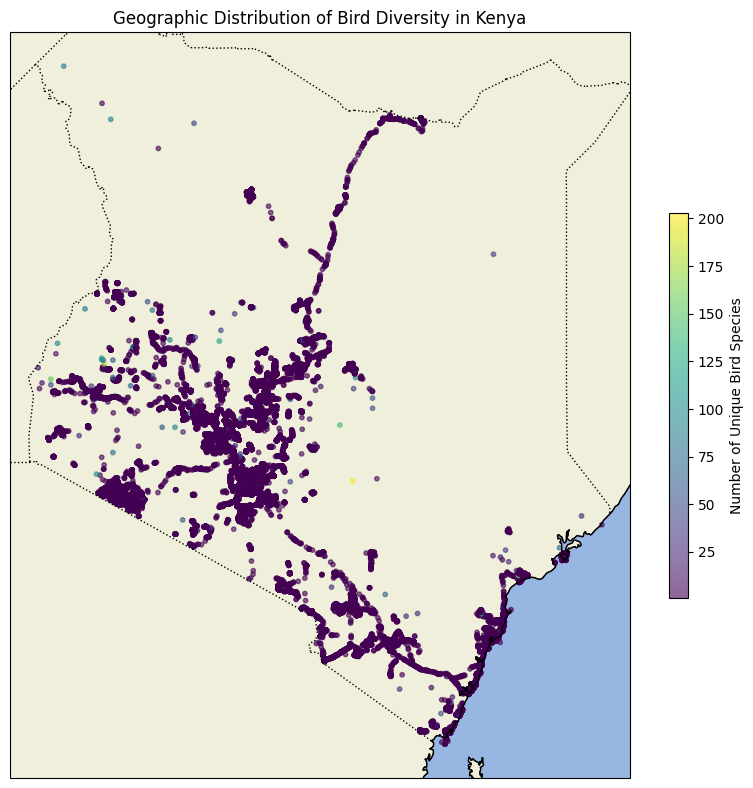

In [50]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add features
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Plot species richness
scatter = ax.scatter(
    gdf_richness['decimalLongitude'],
    gdf_richness['decimalLatitude'],
    c=gdf_richness['species_count'],
    cmap='viridis',
    s=10,
    transform=ccrs.PlateCarree(),
    alpha=0.6
)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', shrink=0.5, pad=0.05)
cbar.set_label('Number of Unique Bird Species')

# Set title and labels
ax.set_title('Geographic Distribution of Bird Diversity in Kenya')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


/var/folders/l0/k7f2rhdj5xg3__zf2_xlw76c0000gn/T/ipykernel_7394/73759436.py:10: DtypeWarning: Columns (170) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='\t')


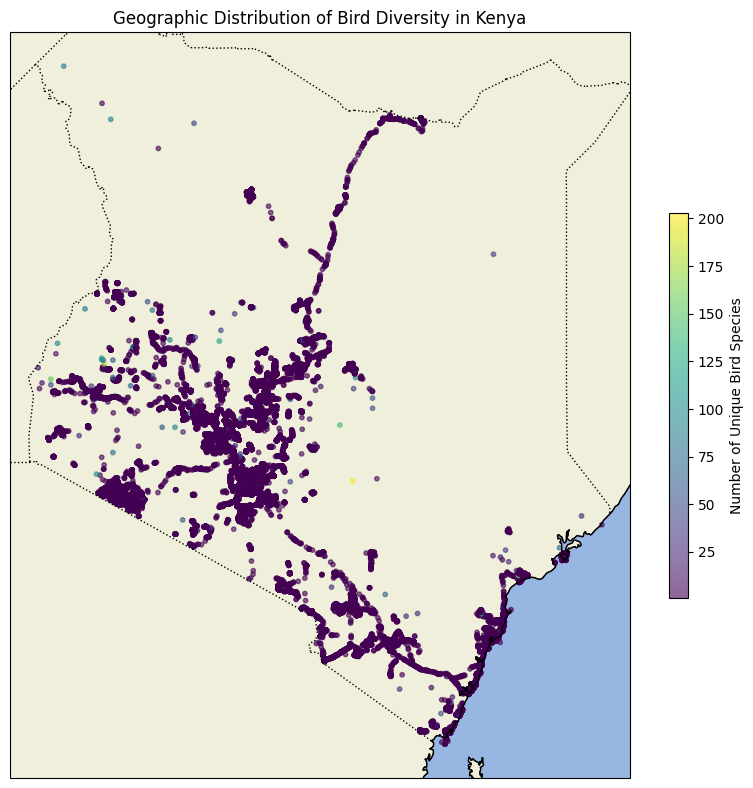

In [51]:
# Required Libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the dataset
file_path = '/Users/mina/Desktop/MADS/3rd_semester/WorkshopI/geospatial-data-analysis/data/GBIT_annotated_archive/DARWIN_CORE_ARCHIVE/0020723-241024112534372/occurrence.txt'
df = pd.read_csv(file_path, delimiter='\t')

# Filter for Kenya and ensure records have coordinates
df_kenya = df[(df['countryCode'] == 'KE') & df['decimalLatitude'].notna() & df['decimalLongitude'].notna()]

# Convert to GeoDataFrame with geometry points
gdf = gpd.GeoDataFrame(
    df_kenya,
    geometry=gpd.points_from_xy(df_kenya['decimalLongitude'], df_kenya['decimalLatitude']),
    crs='EPSG:4326'
)

# Calculate species richness (number of unique species at each location)
species_richness = gdf.groupby(['decimalLatitude', 'decimalLongitude']).agg({'scientificName': 'nunique'}).reset_index()
species_richness.rename(columns={'scientificName': 'species_count'}, inplace=True)

# Convert to GeoDataFrame for richness data
gdf_richness = gpd.GeoDataFrame(
    species_richness,
    geometry=gpd.points_from_xy(species_richness['decimalLongitude'], species_richness['decimalLatitude']),
    crs='EPSG:4326'
)

# Plot the geographic distribution of bird diversity in Kenya
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add geographic features
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Plot species richness data as points with color intensity based on richness
scatter = ax.scatter(
    gdf_richness['decimalLongitude'],
    gdf_richness['decimalLatitude'],
    c=gdf_richness['species_count'],
    cmap='viridis',
    s=10,
    transform=ccrs.PlateCarree(),
    alpha=0.6
)

# Add a colorbar to indicate species richness levels
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', shrink=0.5, pad=0.05)
cbar.set_label('Number of Unique Bird Species')

# Set title and axis labels
ax.set_title('Geographic Distribution of Bird Diversity in Kenya')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()
